# Random Forest

Or when one decision tree is not enough, and you want to use the entire forest

https://towardsdatascience.com/understanding-random-forest-58381e0602d2 is cool!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
# RandomForestClassifier for classification

In [2]:
happy = pd.read_csv("./data/happiness.csv", usecols=[1,2,3])

#dependent variable
y = happy['happy']

# explaining variables
X = happy[['temp', 'fish']]

# _train related to the training set, _test to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Learning

Basically, if you understood how decision trees work, you should easily understand random forest.

#### Instead of using one tree, you use multiple trees, and there is a vote to decide what values should be predicted

Each tree use a part of the data, and a part of the features. It's an exploration of the space of your dataset.

This exploration brings the robustness of RF.

In [3]:
rfr =  RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.predict(X_test)

array([3.19145999, 0.95926237, 3.95444922, 0.63797402, 1.40285864,
       4.54395925, 4.68995652, 2.5389771 , 1.42282577, 4.35627446,
       3.80232255, 1.44226716, 0.85610185, 1.70512076, 1.09682861,
       1.69950179, 2.85722988, 2.7952015 , 0.86949568, 1.96425313,
       3.56752283, 4.54679347, 3.1701614 , 3.8111736 , 1.56688674,
       4.54157968, 2.38074175, 4.73808172, 0.78765268, 2.84266436,
       3.60258448, 3.28568178, 3.13392177, 2.29043704, 3.6940262 ,
       0.49688799, 3.4711017 , 4.59033795, 3.25807501, 4.00722251,
       0.30968874, 2.99624205, 1.61428276, 3.3736213 , 4.04051574,
       1.76093664, 2.8027718 , 1.73783643, 0.93663282, 0.54567683,
       0.76211283, 0.47916865, 3.95412689, 1.23987532, 2.5519374 ,
       0.54012983, 0.89326993, 0.64925746, 3.137759  , 3.54054037,
       0.89255241, 1.17257399, 3.7201908 , 3.02946365, 0.89798022,
       1.14663995, 2.30062118, 3.2304109 , 3.60972963, 2.69659343,
       0.77656784, 3.45930519, 4.5653833 , 4.71285152, 3.57662

Mean Squared Error : 0.6312767407597653


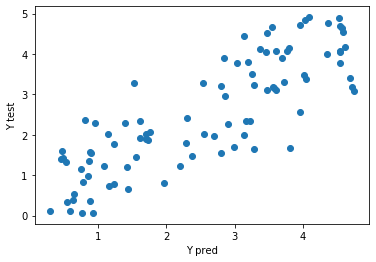

In [4]:
#our predictions
y_pred = rfr.predict(X_test)

print("Mean Squared Error : "+str(np.mean((y_pred-y_test)**2)))

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()

In [5]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Some parameters are just the trees parameters, so I won't describe them.
- bootstrap if you use bootstrap (i.e. samples of your dataset). each tree will be trained on a subset of your training data (robustness++).
- n_estimators is the number of trees you use, it's like the size of the forest. The higher it is, the longer the computation will last.
- n_jobs is the number of jobs you use (parallel computing), it diminishes the computation time.
- oob_score, out of bags error, to check the validity of the bootsrap (e.g. if a line is not under or over-represented)
- verbose, True if you loooove logs :-)
- warm_start, cf doc https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

One of the drawbacks of random forests is the number of parameters involved in the learning algorithm, and that you have to choose!

### Feature importance

Random forest provides a way to measure how the explaining variable are important ot predict the variable of interest. Here's an example with the fish dataset!

In [43]:
fish = pd.read_csv("./data/fish.csv", usecols=np.arange(1,20,1))

#dependent variable
y = fish['health']

# explaining variables
names = fish.columns[1:len(fish.columns)]
X = fish[names]

# _train related to the training set, _test to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
df = pd.DataFrame({ "Feature" : names,
            "Feature importance" : rfr.feature_importances_})
df

,Feature,Feature importance
0,Blacktip Shark,0.260112
1,Dolphin,0.343125
2,Blackfin Tuna,0.025725
3,Black Drum,0.025126
4,Black Sea Bass,0.024120
5,Bluefish,0.024277
6,Bluefin Tuna,0.022678
7,Blue Marlin,0.021102
8,Blueline Tilefish,0.031754
9,Butterfish,0.024700


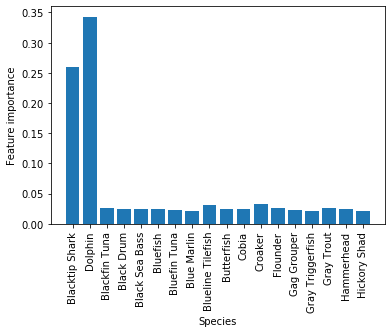

In [59]:
plt.bar(range(len(df['Feature importance'])), df['Feature importance'])
plt.xticks(range(len(df['Feature importance'])), df['Feature'], rotation = 90)
plt.ylabel('Feature importance')
plt.xlabel('Species')
plt.show()

We highlighted the two important species we constructed in the generate_dataset.ipynb file!